# Data Wrangling

## 1. Introduction
This step focuses on collecting  data, organizing it, and making sure it's well defined. 

## 2. Imports

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from datetime import datetime
import missingno as msno


## 3. Load HR Analytics Data

In [2]:
# Read in the dataset
df = pd.read_csv('C:/Users/tubac/OneDrive/Desktop/Springboard/CapstoneTwo-HRAnalytics/dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Structure of the dataframe
df.sample(5).transpose()

,1437,1058,912,744,776
Age,39,34,26,37,20
Attrition,No,Yes,No,Yes,Yes
BusinessTravel,Non-Travel,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Frequently
DailyRate,105,790,583,1141,769
Department,Research & Development,Sales,Research & Development,Research & Development,Sales
DistanceFromHome,9,24,4,11,9
Education,3,4,2,2,3
EducationField,Life Sciences,Medical,Life Sciences,Medical,Marketing
EmployeeCount,1,1,1,1,1
EmployeeNumber,2022,1489,1275,1033,1077


Column names correspond to what those columns store

In [5]:
# State of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are 1,470 rows and 35 columns in the data.


In [6]:
# Shape of data
df.shape

(1470, 35)

## 4. Data Definiton

In [7]:
# Column names and Data Types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

The data types of the columns are sensible.

In [8]:
# Description of the columns (summary statistics for each column)
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0



'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'and 'OverTime' columns have unique values. We can check the counts and percentages of unique values.

Also, 'EmployeeCount', 'Over18' and 'StandardHours' columns seems to have same value. 
 


In [9]:
# Unique values and counts
unique_values = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df[unique_values].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [10]:
# Percents of unique values
for i in unique_values:
    print(df[i].value_counts(normalize=True)*100, "\n")

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64 

BusinessTravel
Travel_Rarely        70.952381
Travel_Frequently    18.843537
Non-Travel           10.204082
Name: proportion, dtype: float64 

Department
Research & Development    65.374150
Sales                     30.340136
Human Resources            4.285714
Name: proportion, dtype: float64 

EducationField
Life Sciences       41.224490
Medical             31.564626
Marketing           10.816327
Technical Degree     8.979592
Other                5.578231
Human Resources      1.836735
Name: proportion, dtype: float64 

Gender
Male      60.0
Female    40.0
Name: proportion, dtype: float64 

JobRole
Sales Executive              22.176871
Research Scientist           19.863946
Laboratory Technician        17.619048
Manufacturing Director        9.863946
Healthcare Representative     8.911565
Manager                       6.938776
Sales Representative          5.646259
Research Director             5.442177
Hu

## 5. Data Cleaning

In [11]:
# # Check for missing values
df.isnull().values.any()

False

There is no missing data!

<Axes: >

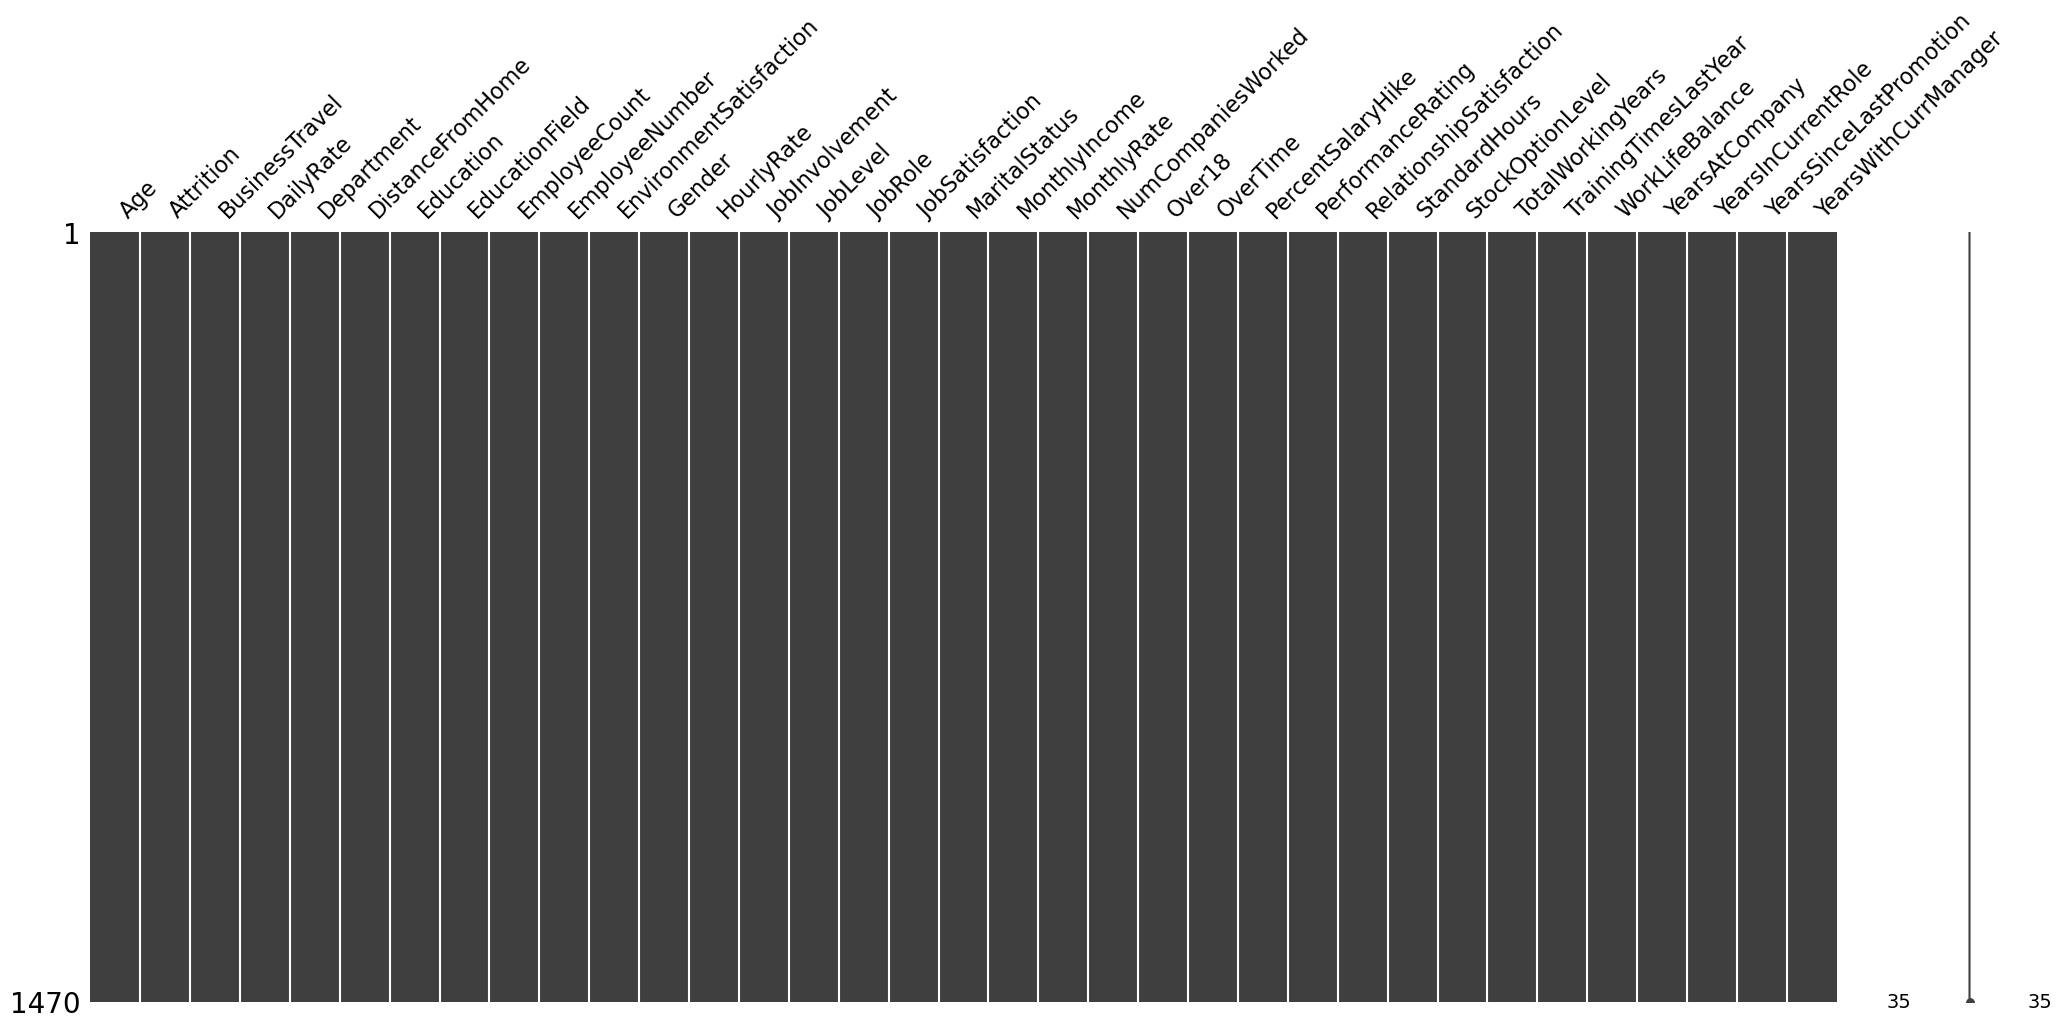

In [12]:
msno.matrix(df)

In [13]:
# Check for duplicates
df.duplicated().sum()

0


There are no duplicate rows!

According to summary statistics for each column; 'EmployeeCount', 'Over18' and 'StandardHours' seems to have same values. Let's check it!


In [14]:
# Find useless features
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [15]:
# Drop useless features (variables with zero variance)
df = df.drop(columns=['StandardHours', 'EmployeeCount', 'Over18'])
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [16]:
# Validating numerical data
df.select_dtypes("number").head().transpose()

,0,1,2,3,4
Age,41,49,37,33,27
DailyRate,1102,279,1373,1392,591
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EmployeeNumber,1,2,4,5,7
EnvironmentSatisfaction,2,3,4,4,1
HourlyRate,94,61,92,56,40
JobInvolvement,3,2,2,3,3
JobLevel,2,2,1,1,1
JobSatisfaction,4,2,3,3,2


## 6. Data Visualisation

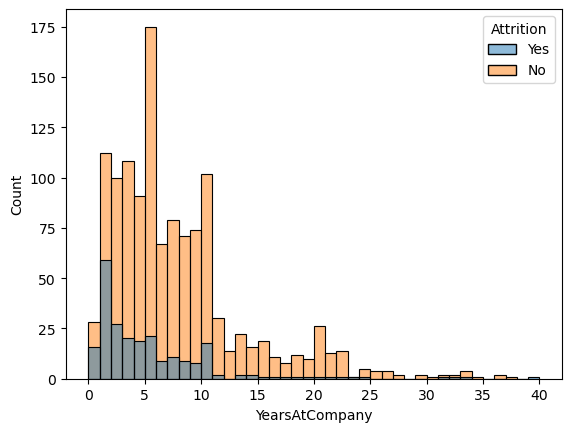

In [17]:
# Workers with low YearsAtCompany are more likely to quit their jobs
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', binwidth=1)
plt.show()

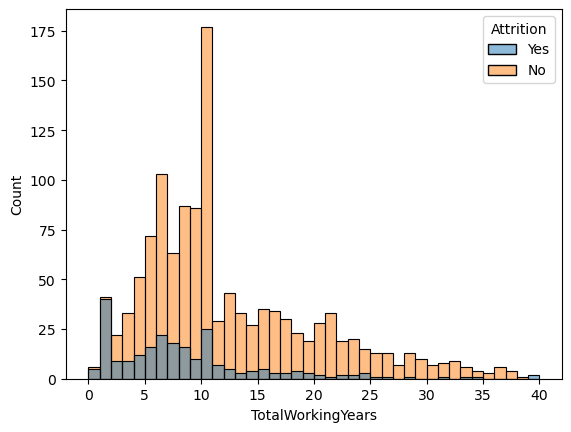

In [18]:
# Workers with low TotalWorkingYears are more likely to quit there jobs.
sns.histplot(data=df, x='TotalWorkingYears', hue='Attrition', binwidth=1)
plt.show()

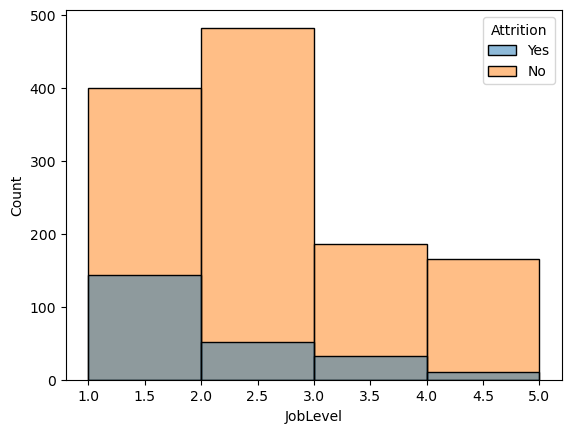

In [19]:
# Workers with low JobLevel are more likely to quit their jobs
sns.histplot(data=df, x='JobLevel', hue='Attrition', binwidth=1)
plt.show()

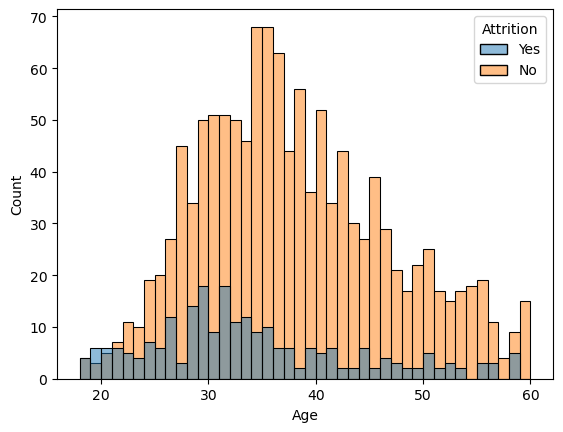

In [20]:
sns.histplot(data=df, x='Age', hue='Attrition', binwidth=1)
plt.show()

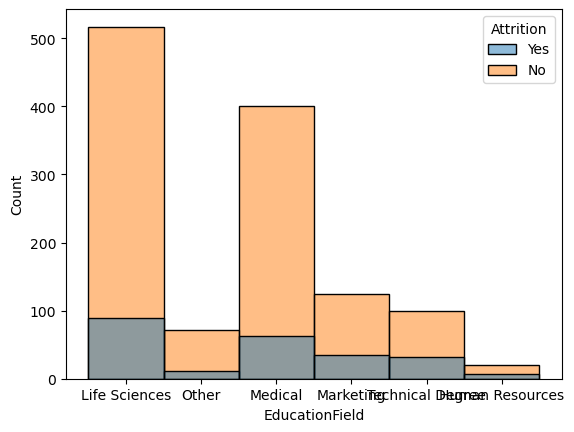

In [21]:
#HR and Technical degree holders are more likely to quit than employees with other educational backgrounds
sns.histplot(data=df, x='EducationField', hue='Attrition', binwidth=1)
plt.show()

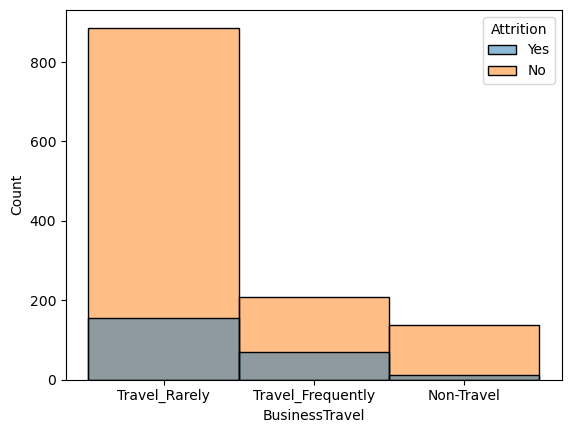

In [22]:
# Employees who travel frequently are more likely to quit than their counterparts who do not travel as much.
sns.histplot(data=df, x='BusinessTravel', hue='Attrition')
plt.show()

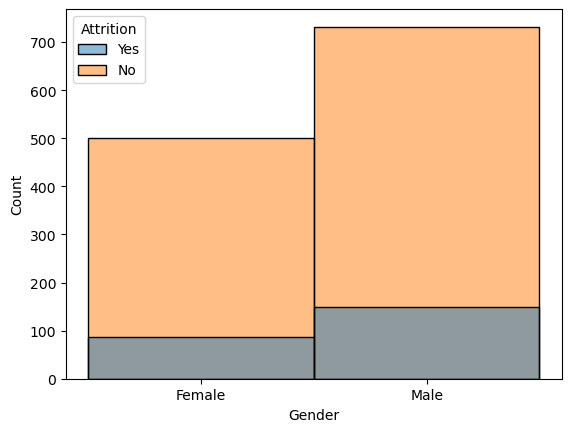

In [23]:
# Males are more likely to resign
sns.histplot(data=df, x='Gender', hue='Attrition')
plt.show()

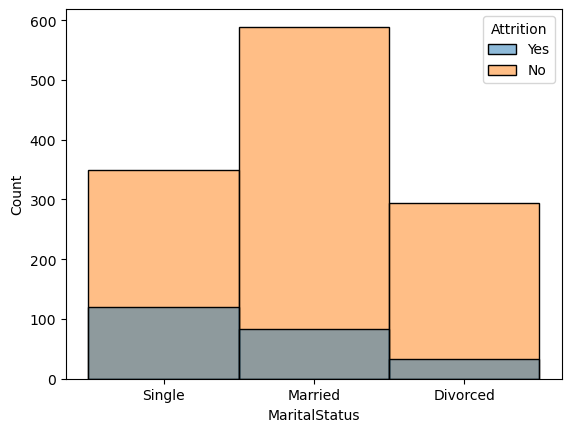

In [24]:
# Employees with a single marital status are more likely to quit compared to those who are married or divorced
sns.histplot(data=df, x='MaritalStatus', hue='Attrition')
plt.show()

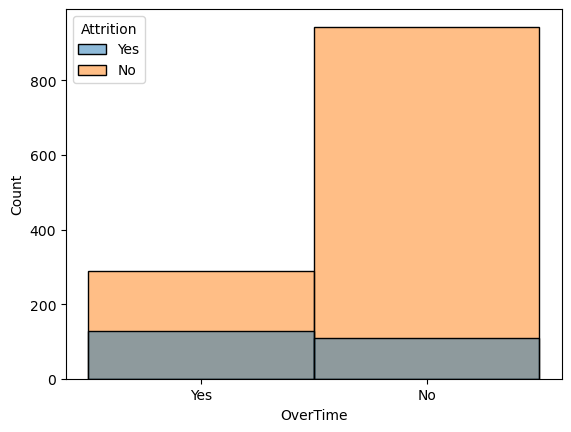

In [25]:
# Employees who work longer hours are more likely to quit than their counterparts
sns.histplot(data=df, x='OverTime', hue='Attrition')
plt.show()

The data is ready for Exploratory Data Analysis